**Assignment 02**

a. Data Preparation

b. Exploratory data analysis

c. Hyper parameter analysis and selection

a. Data preparation

In [1]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'

# Download and extract the zip file
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    z.extractall()

# Load the train and test datasets
train_data = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
train_labels = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
test_data = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
test_labels = pd.read_csv('UCI HAR Dataset/test/y_test.txt', delim_whitespace=True, header=None)
features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)

# Combine train and test datasets
data = pd.concat([train_data, test_data], ignore_index=True)
labels = pd.concat([train_labels, test_labels], ignore_index=True)

# Name the columns according to the features
data.columns = features[1].values

# Add the labels to the data
data['Activity'] = labels

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Normalize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

b. Exploratary data analysis

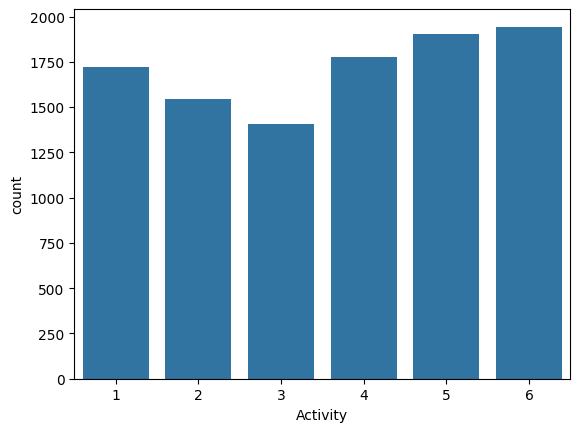

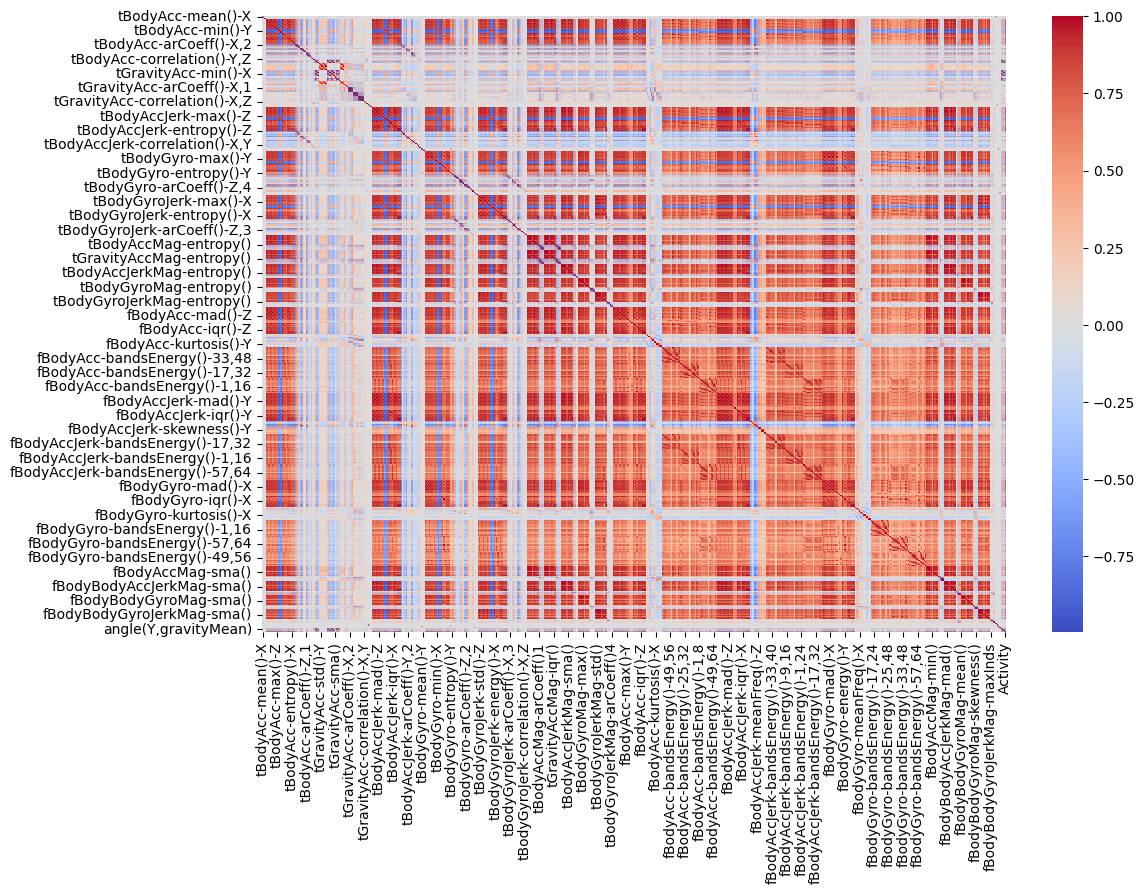

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of activities
sns.countplot(x='Activity', data=data)
plt.show()

# Visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()


c. Hyper parameter analysis and selecction

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

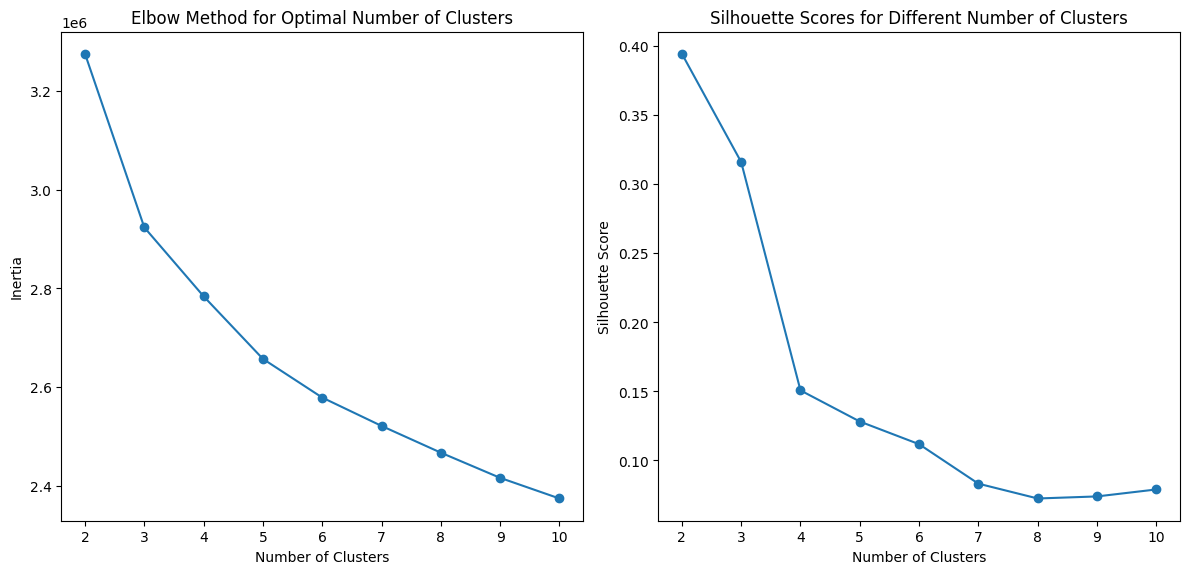

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering with a range of cluster numbers to find the optimal one
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans_labels))

# Plot the inertia to visualize the elbow point
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')

# Plot the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')

plt.tight_layout()
plt.show()


**Assignmnet 03**

a. Clustering

b. Visualization

c. Outer or Outlier Detection and discussion

d. Improvisation of the overall experiment

**a. Clustering**

Here I have chosen three main clustering methods.

1. K-Means clustering method - chosen for its simplicity and efficiency when the number of clusters is known or can be estimated
2. Hierarchial Clustering - selected for its ability to explore different levels of cluster granularity and its interpretability through dendrograms.
3. DBSCAN - used for its strength in identifying clusters of arbitrary shapes and handling noise, especially when the number of clusters is not known.


In [4]:
# K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, fcluster

linked = linkage(scaled_data, 'ward')
max_d = 50  # This distance can be adjusted based on your requirements
hierarchical_labels = fcluster(linked, max_d, criterion='distance')

# DBSCAN Clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=10, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**b. visualization**

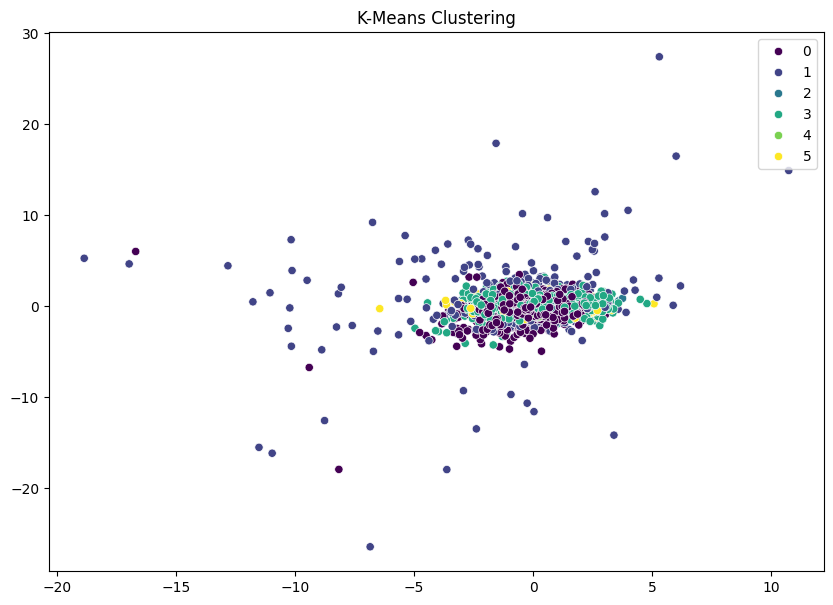

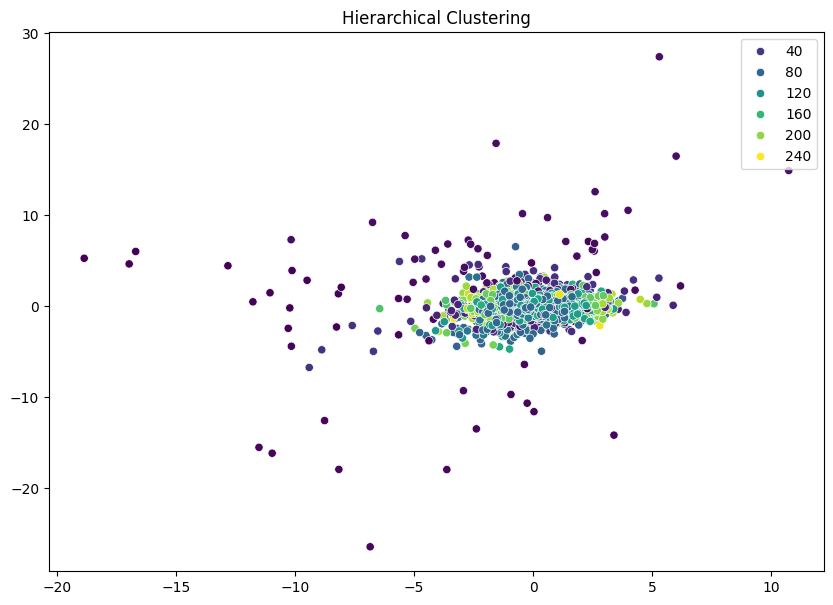

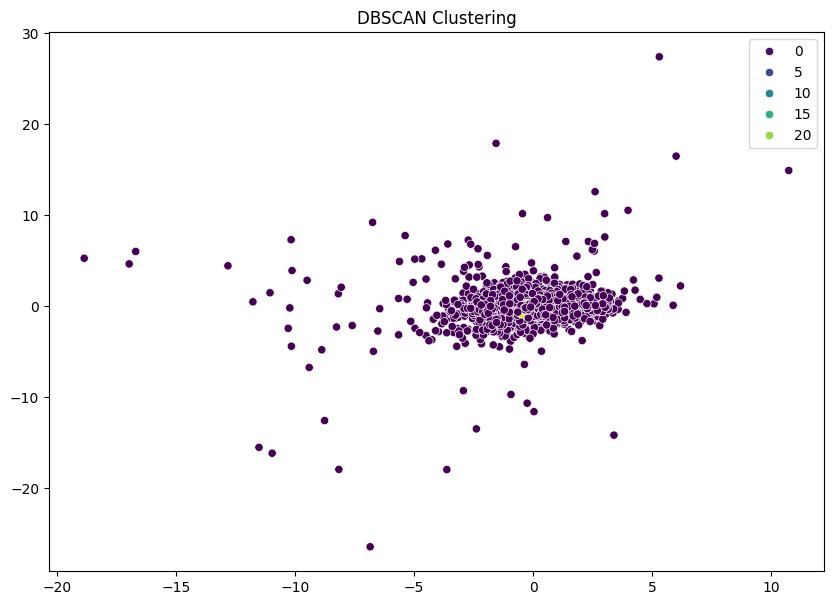

In [5]:
# Visualize K-Means Clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=hierarchical_labels, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


**c. Outlier Detection and Discussion**

In [6]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
data['DBSCAN_Labels'] = dbscan_labels

# K-Means Outliers
cluster_centers = kmeans.cluster_centers_
closest, distances = pairwise_distances_argmin_min(scaled_data, cluster_centers)
threshold = np.percentile(distances, 95)
kmeans_outliers = data[distances > threshold]
print("K-Means Outliers:")
print(kmeans_outliers)

# DBSCAN Outliers
dbscan_outliers = data[data['DBSCAN_Labels'] == -1]
print("DBSCAN Outliers:")
print(dbscan_outliers)

# Hierarchical Outliers
from scipy.spatial.distance import cdist

hierarchical_centers = []
for label in np.unique(hierarchical_labels):
    cluster_points = scaled_data[hierarchical_labels == label]
    cluster_center = cluster_points.mean(axis=0)
    hierarchical_centers.append(cluster_center)
hierarchical_centers = np.array(hierarchical_centers)
hierarchical_distances = cdist(scaled_data, hierarchical_centers, 'euclidean').min(axis=1)
threshold = np.percentile(hierarchical_distances, 95)
hierarchical_outliers = data[hierarchical_distances > threshold]
print("Hierarchical Clustering Outliers:")
print(hierarchical_outliers)


K-Means Outliers:
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
27              0.144504           0.189263           0.062769   
66             -0.166426          -0.119353           0.133035   
67             -0.239103          -0.096904           0.148035   
69              0.303833           0.103648          -0.245331   
70             -0.361205          -0.268121           0.176896   
...                  ...                ...                ...   
9888            0.248988          -0.054485          -0.094429   
9893            0.029089          -0.126367          -0.136597   
9894            0.242932          -0.017346          -0.160880   
9913            0.436585           0.016542          -0.107352   
10055           0.293911           0.027124          -0.107460   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
27            -0.904300         -0.181937         -0.443151         -0.901100   
66            -0.633135    

**d. Improvisation of the Overall Experiment**

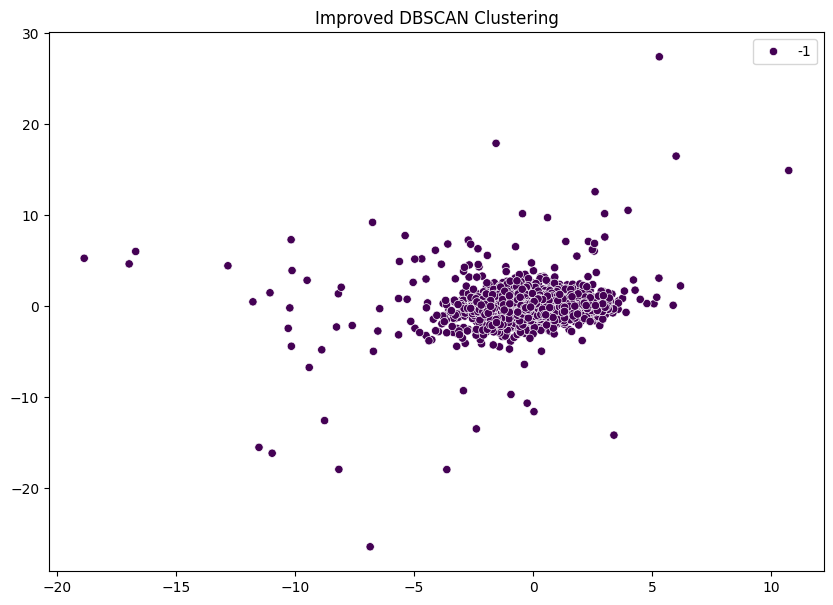

In [7]:
# Example: Adjust DBSCAN parameters
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Visualize the new DBSCAN clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('Improved DBSCAN Clustering')
plt.show()


**Assignment 04**

a. Evaluation of the algorithm’s performance

b. Improvisation of the algorithm’s performance

a. Evaluation of the algorithm’s performance

In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Scores
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")

# Calinski-Harabasz Index
kmeans_ch = calinski_harabasz_score(scaled_data, kmeans_labels)
hierarchical_ch = calinski_harabasz_score(scaled_data, hierarchical_labels)
print(f"K-Means Calinski-Harabasz Index: {kmeans_ch}")
print(f"Hierarchical Clustering Calinski-Harabasz Index: {hierarchical_ch}")


# Davies-Bouldin Index (Lower is better)
kmeans_db = davies_bouldin_score(scaled_data, kmeans_labels)
hierarchical_db = davies_bouldin_score(scaled_data, hierarchical_labels)


print(f"K-Means Davies-Bouldin Index: {kmeans_db}")
print(f"Hierarchical Clustering Davies-Bouldin Index: {hierarchical_db}")


# Perform DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Check the number of unique clusters
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Exclude noise points

if n_clusters_dbscan > 1:
    # Calculate evaluation metrics if valid clusters are found
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
    dbscan_ch = calinski_harabasz_score(scaled_data, dbscan_labels)
    dbscan_db = davies_bouldin_score(scaled_data, dbscan_labels)

    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
    print(f"DBSCAN Calinski-Harabasz Index: {dbscan_ch}")
    print(f"DBSCAN Davies-Bouldin Index: {dbscan_db}")
else:
    print("DBSCAN did not produce valid clusters for evaluation metrics calculation.")



K-Means Silhouette Score: 0.11170815665278065
Hierarchical Clustering Silhouette Score: 0.04056762666661061
K-Means Calinski-Harabasz Index: 2562.0763318007994
Hierarchical Clustering Calinski-Harabasz Index: 123.68508594826704
K-Means Davies-Bouldin Index: 2.361993399028419
Hierarchical Clustering Davies-Bouldin Index: 2.500257236694774
DBSCAN Silhouette Score: -0.28952693325433454
DBSCAN Calinski-Harabasz Index: 79.73574446917516
DBSCAN Davies-Bouldin Index: 2.0498396135520225


b. Improvisation of the algorithm’s performance

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k = 0
best_score = -1
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, kmeans_labels)
    print(f"Silhouette Score for {k} clusters: {score}")
    if score > best_score:
        best_k = k
        best_score = score

print(f"Best number of clusters for K-Means: {best_k} with Silhouette Score: {best_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 2 clusters: 0.3942991642725773


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 3 clusters: 0.3159136575554689


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for 4 clusters: 0.15064582218461098
Best number of clusters for K-Means: 2 with Silhouette Score: 0.3942991642725773


In [10]:
#Adjusting DBSCAN Parameters
from sklearn.cluster import DBSCAN

best_eps = 0
best_dbscan_score = -1
for eps in np.arange(0.5, 2.0, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(scaled_data)
    if len(set(dbscan_labels)) > 1:
        score = silhouette_score(scaled_data, dbscan_labels)
        print(f"Silhouette Score for eps={eps}: {score}")
        if score > best_dbscan_score:
            best_eps = eps
            best_dbscan_score = score

print(f"Best eps for DBSCAN: {best_eps} with Silhouette Score: {best_dbscan_score}")


Best eps for DBSCAN: 0 with Silhouette Score: -1
